### **Part 2: Direct Graph**

We represent the currency exchange network as a directed graph $G = (V, E, W)$, where:

- **V**: Set of currencies  
- **E**: Set of directed edges representing exchange relationships between currencies  
- **W**: Set of weights associated with each edge, representing the exchange rate  

The exchange rates at Bank XYZ on **16 October 2025** are given in the table below:

| Currency Pair | XYZ Buys | XYZ Sells |
|---------------|----------|-----------|
| USD/KHR       | 4014.00  | 4034.00   |
| EUR/USD       | 1.125558 | 1.181335  |
| JPY/KHR       | 25.1539  | 27.0393   |
| USD/JPY       | 148.450589 | 160.372746 |
| AUD/USD       | 0.616106 | 0.658097  |
| AUD/KHR       | 2485.37  | 2641.60   |

This structure allows us to model currency exchanges as a weighted directed graph, which is useful in financial analysis, algorithm design, and economic studies.

Each exchange rate represents the value of one unit of the foreign currency in comparison to one US dollar (USD). For example, the exchange from USD to KHR at Bank XYZ is represented by two columns:

**XYZ Sells** at 4034, meaning that for 1,USD, the bank sells it at this rate; and **XYZ Buys** at 4014, meaning that for 1,USD, the bank buys it at this rate and graph G(V,E,W) given by :

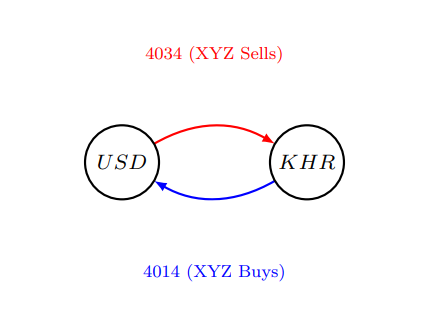

#### **Question 1. Model this problem as a graph and then simulate it in Python using NetworkX package.**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Nodes of graph: ['USD', 'EUR', 'KHR', 'JPY', 'AUD']
Edges of graph with weights: [('USD', 'KHR', {'weight': 4034}), ('USD', 'EUR', {'weight': 0.8884482185724769}), ('USD', 'JPY', {'weight': 160.372745}), ('USD', 'AUD', {'weight': 1.6230973241617512}), ('EUR', 'USD', {'weight': 1.181335}), ('KHR', 'USD', {'weight': 0.00024912805181863477}), ('KHR', 'JPY', {'weight': 0.039755266578940046}), ('KHR', 'AUD', {'weight': 0.0004023545789962863}), ('JPY', 'KHR', {'weight': 27.0393}), ('JPY', 'USD', {'weight': 0.0067362481128316705}), ('AUD', 'USD', {'weight': 0.658097}), ('AUD', 'KHR', {'weight': 2611.6})]

 ______________________________________________________

Exchange rate from USD to JPY: 160.372745
Exchange rate from EUR to USD: 1.181335


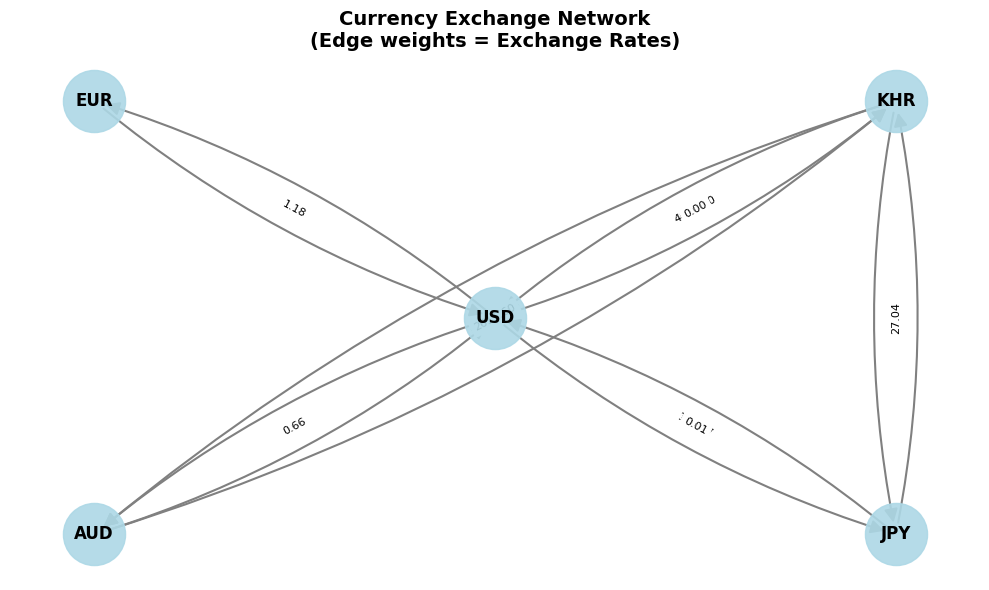


--- Complete Exchange Rate Table ---
Direction | Rate
------------------------------
USD → KHR | 4034.000000
USD → EUR | 0.888448
USD → JPY | 160.372745
USD → AUD | 1.623097
EUR → USD | 1.181335
KHR → USD | 0.000249
KHR → JPY | 0.039755
KHR → AUD | 0.000402
JPY → KHR | 27.039300
JPY → USD | 0.006736
AUD → USD | 0.658097
AUD → KHR | 2611.600000


In [16]:
#1.1 Setting the graph of exchange rate G(V,E,W) as G, and creating this graph using the function nx.DiGraph()
G = nx.DiGraph()

#1.2
node = ['USD', 'EUR', 'KHR', 'JPY','AUD']

edge_var = [
    # USD/KHR: Bank buys KHR at 4014, sells at 4034
    ('USD', 'KHR', 4034),  
    ('KHR', 'USD', 1/4014),
    
    # EUR/USD: Bank buys USD at 1.125558, sells at 1.181335  
    ('EUR', 'USD', 1.181335),
    ('USD', 'EUR', 1/1.125558),
    
    # JPY/KHR: Bank buys KHR at 25.1539, sells at 27.0393
    ('JPY', 'KHR', 27.0393),
    ('KHR', 'JPY', 1/25.1539),
    
    # USD/JPY: Bank buys JPY at 148.450589, sells at 160.372745
    ('USD', 'JPY', 160.372745),
    ('JPY', 'USD', 1/148.450589),

    # AUD/USD: Bank buys USD at 0.616106, sells at 0.658097
    ('AUD', 'USD', 0.658097),
    ('USD', 'AUD', 1/0.616106),

    # AUD/KHR: Bank buys KHR at 2485.37, sells at 2611.60
    ('AUD', 'KHR', 2611.60),
    ('KHR', 'AUD', 1/2485.37)
]

position = {
    'USD' : (0, 0),
    'EUR' : (-2, 1),
    'KHR' : (2, 1),
    'JPY' : (2, -1),
    'AUD' : (-2, -1)
}

#1.3
G.add_nodes_from(node)
G.add_weighted_edges_from(edge_var)

print("Nodes of graph:", G.nodes())
print("Edges of graph with weights:", G.edges(data=True))


#1.4
print("\n ______________________________________________________\n")

#bank XYZ sells between USD and JPY
G.add_edge('USD', 'JPY', rate=160.372745)
G.add_edge('EUR', 'USD', rate=1.181335)

exchange_rate = nx.get_edge_attributes(G, 'rate')

for pair, rate in exchange_rate.items():
    print(f"Exchange rate from {pair[0]} to {pair[1]}: {rate}")


# 1.5 Visualize the graph
plt.figure(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos=position, node_color='lightblue', 
                      node_size=2000, alpha=0.9)

# Draw node labels
nx.draw_networkx_labels(G, pos=position, font_size=12, font_weight='bold')

# Draw edges with arrows and curvature
nx.draw_networkx_edges(G, pos=position, edge_color='gray', 
                      arrows=True, arrowsize=20,
                      connectionstyle="arc3,rad=0.1",
                      width=1.5)

# Draw edge labels (weights)
edge_labels = {(u, v): f"{d['weight']:.2f}" 
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=position, edge_labels=edge_labels, 
                            font_size=8)

plt.title("Currency Exchange Network\n(Edge weights = Exchange Rates)", 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Additional: Display all exchange rates clearly
print("\n--- Complete Exchange Rate Table ---")
print("Direction | Rate")
print("-" * 30)
for u, v, data in G.edges(data=True):
    print(f"{u} → {v} | {data['weight']:.6f}")


#### **Quesion 2: Some defination and Graph Properties**

In [3]:
#2.1

print("\n ______________________________________________________\n")
print("2.1. neighbors, successors, and predecessors of a vertex v in graph G, respectively.\n")

#all neighbors of 'AUD'
neighbors_aud = list(G.neighbors('AUD'))
print(f"Γ(AUD) Neighbors of 'AUD': {neighbors_aud} \n")

#successors of 'USD'
successors_usd = list(G.successors('USD'))
print(f"Γ⁺(USD) Successors of 'USD': {successors_usd} \n")

#predecessors of 'EUR'
predecessors_eur = list(G.predecessors('EUR'))
print(f"Γ⁻(EUR) Predecessors of 'EUR': {predecessors_eur} \n")





 ______________________________________________________

2.1. neighbors, successors, and predecessors of a vertex v in graph G, respectively.

Γ(AUD) Neighbors of 'AUD': ['USD', 'KHR'] 

Γ⁺(USD) Successors of 'USD': ['KHR', 'EUR', 'JPY', 'AUD'] 

Γ⁻(EUR) Predecessors of 'EUR': ['USD'] 



In [4]:
#2.2

print("\n ______________________________________________________\n")
print("2.2.  Identify the currencies with which JPY can be exchanged.\n")

# Find all currencies that can be exchanged with JPY
exchangable_currencies_jpy_direct = list(G.successors('JPY'))
print(f"Γ⁺(JPY) Currencies that can be exchanged DIRECTLY with 'JPY': {exchangable_currencies_jpy_direct} \n")

exchangable_currencies_jpy_all = list(nx.descendants(G, 'JPY'))
print(f"All Currencies that can be exchanged (DIRECTLY or INDIRECTLY) with 'JPY': {exchangable_currencies_jpy_all} \n")

#show the actual rates
print("Exchange rates from JPY to other currencies:")
for neighbor in G.neighbors('JPY'):
    if G.has_edge('JPY', neighbor):
        rate = G['JPY'][neighbor]['weight']
        print(f"1 JPY = {rate:.6f} {neighbor}")
    if G.has_edge(neighbor, 'JPY'):
        rate = G[neighbor]['JPY']['weight']
        print(f"1 {neighbor} = {rate:.6f} JPY")



 ______________________________________________________

2.2.  Identify the currencies with which JPY can be exchanged.

Γ⁺(JPY) Currencies that can be exchanged DIRECTLY with 'JPY': ['KHR', 'USD'] 

All Currencies that can be exchanged (DIRECTLY or INDIRECTLY) with 'JPY': ['USD', 'AUD', 'KHR', 'EUR'] 

Exchange rates from JPY to other currencies:
1 JPY = 27.039300 KHR
1 KHR = 0.039755 JPY
1 JPY = 0.006736 USD
1 USD = 160.372745 JPY


In [12]:
#2.3
print("\n ______________________________________________________\n")
print("2.3. Find possible path of currencies network from JPY to KHR\n")

# Find all simple paths from JPY to KHR
all_paths = list(nx.all_simple_paths(G, source='JPY', target='KHR'))
print(f"All possible paths from JPY to KHR: {all_paths}\n")


 ______________________________________________________

2.3. Find possible path of currencies network from JPY to KHR

All possible paths from JPY to KHR: [['JPY', 'KHR'], ['JPY', 'USD', 'KHR'], ['JPY', 'USD', 'AUD', 'KHR']]



In [13]:
#2.4
print("\n ______________________________________________________\n")
print("2.4. Check if there is a path from EUR to KHR\n")

# Check if there is a path from EUR to KHR
if nx.has_path(G, source='EUR', target='KHR'):
    paths_eur_to_khr = list(nx.all_simple_paths(G, source='EUR', target='KHR'))
    print(f"\nYes, it is possible to exchange EUR to KHR. \nPossible paths are: {paths_eur_to_khr}\n")
    print("This exchange process can be represented in the graph model as a sequence of directed edges connecting EUR to KHR through intermediate currencies.\n")


 ______________________________________________________

2.4. Check if there is a path from EUR to KHR


Yes, it is possible to exchange EUR to KHR. 
Possible paths are: [['EUR', 'USD', 'KHR'], ['EUR', 'USD', 'JPY', 'KHR'], ['EUR', 'USD', 'AUD', 'KHR']]

This exchange process can be represented in the graph model as a sequence of directed edges connecting EUR to KHR through intermediate currencies.



In [14]:
#2.5.
print("\n ______________________________________________________\n")
print("2.5. Find the circle of vertex USD by using function nx.simplecycles().\n")

# Find all simple cycles in the graph
simple_cycles = list(nx.simple_cycles(G))
print(f"All simple cycles in the graph: \n{simple_cycles}\n")

# Find the cycle containing USD
usd_cycle = [cycle for cycle in simple_cycles if 'USD' in cycle]
print(f"Cycle containing USD: \n{usd_cycle}\n")


 ______________________________________________________

2.5. Find the circle of vertex USD by using function nx.simplecycles().

All simple cycles in the graph: 
[['JPY', 'KHR', 'USD'], ['JPY', 'KHR'], ['JPY', 'KHR', 'AUD', 'USD'], ['JPY', 'USD', 'KHR'], ['JPY', 'USD'], ['JPY', 'USD', 'AUD', 'KHR'], ['USD', 'KHR'], ['USD', 'KHR', 'AUD'], ['USD', 'EUR'], ['USD', 'AUD'], ['USD', 'AUD', 'KHR'], ['AUD', 'KHR']]

Cycle containing USD: 
[['JPY', 'KHR', 'USD'], ['JPY', 'KHR', 'AUD', 'USD'], ['JPY', 'USD', 'KHR'], ['JPY', 'USD'], ['JPY', 'USD', 'AUD', 'KHR'], ['USD', 'KHR'], ['USD', 'KHR', 'AUD'], ['USD', 'EUR'], ['USD', 'AUD'], ['USD', 'AUD', 'KHR']]



#### **Quesion 3: Basic network analysis of exchange rates at Bank XYZ.**

In [26]:
print("_______________________________________________________\n")
print("3.1. Would the series of exchanges result in a profit?\n")

print("Starting with 1000 USD:\n")

def calculate_profit(cycle, initial_amount=1000):
    current_amount = initial_amount
    for i in range(len(cycle)-1):
        from_curr = cycle[i]
        to_curr = cycle[i+1]
        rate = G[from_curr][to_curr]['weight']
        current_amount *= rate
    profit = current_amount - initial_amount
    profit_percentage = (profit / initial_amount) * 100
    return current_amount, profit, profit_percentage

# Test all three cases
cases = [
    ['USD', 'KHR', 'USD'],
    ['USD', 'JPY', 'USD'], 
    ['USD', 'AUD', 'USD']
]

print(f"{'Case':<20} {'Final Amount':<15} {'Profit/Loss':<15} {'Status':<10}")
print("-" * 60)

for case in cases:
    final_amount, profit, profit_pct = calculate_profit(case)
    status = "PROFIT" if profit > 0 else "LOSS"
    print(f"{' → '.join(case):<20} {final_amount:>10.2f} USD {profit:>+10.2f} USD {status:>10}")


print("_______________________________________________________\n")

_______________________________________________________

3.1. Would the series of exchanges result in a profit?

Starting with 1000 USD:

Case                 Final Amount    Profit/Loss     Status    
------------------------------------------------------------
USD → KHR → USD         1004.98 USD      +4.98 USD     PROFIT
USD → JPY → USD         1080.31 USD     +80.31 USD     PROFIT
USD → AUD → USD         1068.16 USD     +68.16 USD     PROFIT
_______________________________________________________



In [31]:
# Find all simple paths from EUR to KHR
print("_______________________________________________________\n")
print("3.2. Determine the most profitable exchange path from EUR to KHR.\n")

eur_khr_paths = list(nx.all_simple_paths(G, 'EUR', 'KHR'))

print(f"Found {len(eur_khr_paths)} possible paths from EUR to KHR:\n")

path_results = []
for path in eur_khr_paths:
    current_amount = 1000
    steps = []
    
    for i in range(len(path)-1):
        from_curr = path[i]
        to_curr = path[i+1]
        rate = G[from_curr][to_curr]['weight']
        current_amount *= rate
        steps.append(f"{from_curr}→{to_curr}(×{rate:.4f})")
    
    path_results.append({
        'path': path,
        'steps': steps,
        'final_amount': current_amount,
        'effective_rate': current_amount / 1000
    })

# Sort by final amount (descending)
path_results.sort(key=lambda x: x['final_amount'], reverse=True)

# Display all paths
for i, result in enumerate(path_results, 1):
    print(f"Path {i}: {' → '.join(result['path'])}")
    print(f"  Steps: {' → '.join(result['steps'])}")
    print(f"  Effective rate: 1 EUR = {result['effective_rate']:.4f} KHR")
    print(f"  Final amount: {result['final_amount']:,.2f} KHR")
    print()

# Show optimal path
optimal = path_results[0]
print("🎯 OPTIMAL PATH:")
print(f"Route: {' → '.join(optimal['path'])}")
print(f"Final amount: {optimal['final_amount']:,.2f} KHR")
print(f"Exchange rate: 1 EUR = {optimal['effective_rate']:.4f} KHR")

_______________________________________________________

3.2. Determine the most profitable exchange path from EUR to KHR.

Found 3 possible paths from EUR to KHR:

Path 1: EUR → USD → JPY → KHR
  Steps: EUR→USD(×1.1813) → USD→JPY(×160.3727) → JPY→KHR(×27.0393)
  Effective rate: 1 EUR = 5122.7018 KHR
  Final amount: 5,122,701.83 KHR

Path 2: EUR → USD → AUD → KHR
  Steps: EUR→USD(×1.1813) → USD→AUD(×1.6231) → AUD→KHR(×2611.6000)
  Effective rate: 1 EUR = 5007.5385 KHR
  Final amount: 5,007,538.45 KHR

Path 3: EUR → USD → KHR
  Steps: EUR→USD(×1.1813) → USD→KHR(×4034.0000)
  Effective rate: 1 EUR = 4765.5054 KHR
  Final amount: 4,765,505.39 KHR

🎯 OPTIMAL PATH:
Route: EUR → USD → JPY → KHR
Final amount: 5,122,701.83 KHR
Exchange rate: 1 EUR = 5122.7018 KHR
